<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Barplot-config" data-toc-modified-id="Barplot-config-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Barplot config</a></span></li><li><span><a href="#Load-dicio_aberto-xml-files" data-toc-modified-id="Load-dicio_aberto-xml-files-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load dicio_aberto xml files</a></span></li><li><span><a href="#Word-spelling-normalization" data-toc-modified-id="Word-spelling-normalization-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Word spelling normalization</a></span><ul class="toc-item"><li><span><a href="#[ch]-+-consonant-replacement-by-[c]" data-toc-modified-id="[ch]-+-consonant-replacement-by-[c]-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>[ch] + consonant replacement by [c]</a></span></li><li><span><a href="#[ch]-+-vocal-replacement-by-[c]" data-toc-modified-id="[ch]-+-vocal-replacement-by-[c]-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>[ch] + vocal replacement by [c]</a></span></li><li><span><a href="#[ch]-+-vocal-replacement-by-[qu]" data-toc-modified-id="[ch]-+-vocal-replacement-by-[qu]-0.4.3"><span class="toc-item-num">0.4.3&nbsp;&nbsp;</span>[ch] + vocal replacement by [qu]</a></span></li><li><span><a href="#delete-&quot;!&quot;-from-interjections" data-toc-modified-id="delete-&quot;!&quot;-from-interjections-0.4.4"><span class="toc-item-num">0.4.4&nbsp;&nbsp;</span>delete "!" from interjections</a></span></li><li><span><a href="#other-ortographic-replacements" data-toc-modified-id="other-ortographic-replacements-0.4.5"><span class="toc-item-num">0.4.5&nbsp;&nbsp;</span>other ortographic replacements</a></span></li><li><span><a href="#delete-repeated-words" data-toc-modified-id="delete-repeated-words-0.4.6"><span class="toc-item-num">0.4.6&nbsp;&nbsp;</span>delete repeated words</a></span></li></ul></li><li><span><a href="#Remove-prefix-and-suffix-entries" data-toc-modified-id="Remove-prefix-and-suffix-entries-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Remove prefix and suffix entries</a></span></li><li><span><a href="#Remove-abbreviations" data-toc-modified-id="Remove-abbreviations-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Remove abbreviations</a></span></li></ul></li><li><span><a href="#Words-with-[p]-,-[m]-,-[lh]-and-[nh]" data-toc-modified-id="Words-with-[p]-,-[m]-,-[lh]-and-[nh]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Words with [p] , [m] , [lh] and [nh]</a></span></li><li><span><a href="#Free-dipthong-words" data-toc-modified-id="Free-dipthong-words-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Free dipthong words</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li></ul></li><li><span><a href="#[lh]-and-[nh]" data-toc-modified-id="[lh]-and-[nh]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>[lh] and [nh]</a></span><ul class="toc-item"><li><span><a href="#vowels" data-toc-modified-id="vowels-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>vowels</a></span></li><li><span><a href="#contiguous-left" data-toc-modified-id="contiguous-left-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>contiguous left</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#position" data-toc-modified-id="position-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>position</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#double-position" data-toc-modified-id="double-position-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>double position</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import os
import re

import codecs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import squarify 

## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2 + 8))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2+8,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load dicio_aberto xml files

From https://dicionario-aberto.net/resources/xmls.zip

In [3]:
path_to_file = "xmls/"
dic_aberto_corpus = os.listdir(path_to_file)
dic_aberto_corpus

['A.xml',
 'B.xml',
 'C.xml',
 'D.xml',
 'E.xml',
 'F.xml',
 'G.xml',
 'Geo.xml',
 'H.xml',
 'I.xml',
 'J.xml',
 'K.xml',
 'L.xml',
 'M.xml',
 'N.xml',
 'Names.xml',
 'O.xml',
 'P.xml',
 'Q.xml',
 'R.xml',
 'S.xml',
 'T.xml',
 'U.xml',
 'V.xml',
 'W.xml',
 'X.xml',
 'Y.xml',
 'Z.xml']

In [4]:
word_list = []
for file_name in dic_aberto_corpus:
    with open(path_to_file + file_name, encoding="utf-8") as f:
        dic_letter = f.read()
    dic_words = re.findall("\<orth\>(.+)\<\/orth\>", dic_letter)
    word_list = word_list + dic_words
    
word_list[:10] # first 10 entries

['Achafundar',
 'Abacamartado',
 'Abafo',
 'Abaloso',
 'Abarregamento',
 'Abarticular',
 'Abegão',
 'Abelhina',
 'Abelhuar-se',
 'Abesoiro']

In [5]:
word_list = [i.lower() for i in word_list] ## lower case words
word_df_complete = pd.DataFrame(word_list, columns=["word"])
word_df = word_df_complete.copy()

word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128519,zymotechnia
128520,zymotéchnico
128521,zymótico
128522,zytho


## Word spelling normalization

In [6]:
etymological_lh = ["delhi","estilhial","estilhyal","oxalhýdrico","phenylhydroquinazolina","xilharmónica","xilharmónico"]
replace_lh = [i.replace('lh', 'l') for i in etymological_lh]
replace_lh_dict = dict(zip(etymological_lh, replace_lh))

word_df["word"].replace(replace_lh_dict, inplace=True)

In [7]:
etymological_nh = ["anhafia","anhaphia","anharmónico","anhelante","anhelar","anhelação","anhelo","anhidrose",
                   "anhisto","anhistorico","anhydrido","anhydrite","anhydro","anhydromelia","anhydrose","anhélito",
                   "anhýdrico","cyanhýdrico","enharmonia","enharmónico","enhýdride","inhabilidade","inhabilitar",
                   "inhabilitação","inhabilmente","inhabitado","inhabitual","inhabitável","inhalador","inhalante",
                   "inhalar","inhalação","inharmonia","inharmonicamente","inharmónico","inherente","inherentemente",
                   "inherir","inherência","inhibir","inhibitivo","inhibitória","inhibitório","inhibição","inhonestamente"
                   ,"inhonestidade","inhonesto","inhospedeiro","inhospitaleiramente","inhospitaleiro","inhospitalidade"
                   ,"inhumanamente","inhumanidade","inhumano","inhumar","inhumação","inhábil","inhóspito","panharmónico"
                   ,"panharmónio","panhellenismo","panhellênico","persulfocyanhýdrico","selenhydrato","synhedrim","synhédrio"]
replace_nh = [i.replace('nh', 'n') for i in etymological_nh]
replace_nh_dict = dict(zip(etymological_nh, replace_nh))

word_df["word"].replace(replace_nh_dict, inplace=True)

### [ch] + consonant replacement by [c]

In [8]:
word_df[word_df["word"].str.contains("ch[^aáàâãeéèêiíìoóòôõuúù]")]

,word
84,achlamídeas
285,anisochromático
286,anisochromia
293,anomochromia
2082,achlâmydas
...,...
127440,xanthochromia
128320,zootechnia
128321,zootéchnico
128519,zymotechnia


In [9]:
word_df = word_df[~word_df["word"].str.contains("ch[^aáàâãeéèêiíìoóòôõuúù]")]
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128517,zymosimétrico
128518,zymosímetro
128521,zymótico
128522,zytho


### [ch] + vocal replacement by [c]

In [10]:
word_alt_ch = pd.DataFrame(columns=["ch_word","word"])
df = word_df[word_df["word"].str.contains("ch(?=[aáàâãeéèêiíìoóòôõuúù])")].reset_index(drop=True)
word_alt_ch["ch_word"] = df["word"]
word_alt_ch["word"] = word_alt_ch["ch_word"].replace(to_replace=r'ch(?=[aáàâãeéèêiíìoóòôõuúù])', value='c', regex=True)
word_alt_ch

,ch_word,word
0,achafundar,acafundar
1,abrachiocephalia,abraciocephalia
2,abrachiocéphalo,abraciocéphalo
3,acochichar,acocicar
4,acephalorachia,acephaloracia
...,...,...
4363,zoochorographia,zoocorographia
4364,zoochorographico,zoocorographico
4365,zuche,zuce
4366,zuncho,zunco


In [11]:
word_alt_ch = pd.merge(word_alt_ch, word_df, how = "inner", left_on='word', right_on='word')
word_alt_ch

,ch_word,word
0,abichar,abicar
1,acha,aca
2,acha,aca
3,acha,aca
4,acha,aca
...,...,...
871,tronchudo,troncudo
872,ucha,uca
873,ucha,uca
874,ulótricho,ulótrico


In [12]:
writer = pd.ExcelWriter("word_alt_ch.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_alt_ch.to_excel(writer, index=False, sheet_name='word_alt_ch')

writer.save()

In [13]:
word_alt_ch = pd.read_excel("word_alt_ch_annotated.xlsx", sheet_name="word_alt_ch")
word_alt_ch = word_alt_ch[word_alt_ch["etymological_ch"] == "yes"]
word_alt_ch

,ch_word,word,etymological_ch
9,achalmópteros,acalmópteros,yes
12,achária,acária,yes
18,acholia,acolia,yes
19,agorarcha,agorarca,yes
22,altiechoante,altiecoante,yes
...,...,...,...
861,trochantino,trocantino,yes
866,trochobolista,trocobolista,yes
867,trochocarpo,trococarpo,yes
874,ulótricho,ulótrico,yes


In [14]:
word_alt_ch.drop(["word", "etymological_ch"], axis = 1, inplace = True) 
word_alt_ch.columns = ["word"]
word_alt_ch = word_alt_ch.drop_duplicates(keep="first")
word_alt_ch

,word
9,achalmópteros
12,achária
18,acholia
19,agorarcha
22,altiechoante
...,...
861,trochantino
866,trochobolista
867,trochocarpo
874,ulótricho


In [15]:
word_df = word_df.drop_duplicates(keep="first")
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128517,zymosimétrico
128518,zymosímetro
128521,zymótico
128522,zytho


In [16]:
word_df = pd.concat([word_df, word_alt_ch, word_alt_ch]).drop_duplicates(keep=False) # word_df - word_alt_ch 
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128517,zymosimétrico
128518,zymosímetro
128521,zymótico
128522,zytho


### [ch] + vocal replacement by [qu]

In [17]:
word_alt_ch = pd.DataFrame(columns=["ch_word","word"])
df = word_df[word_df["word"].str.contains("ch(?=[eéèêiíì])")].reset_index(drop=True)
word_alt_ch["ch_word"] = df["word"]
word_alt_ch["word"] = word_alt_ch["ch_word"].replace(to_replace=r'ch(?=[eéèêiíì])', value='qu', regex=True)

word_alt_ch = pd.merge(word_alt_ch, word_df, how = "inner", left_on='word', right_on='word')
word_alt_ch

,ch_word,word
0,achiria,aquiria
1,anorchia,anorquia
2,archimoquenqueiro,arquimoquenqueiro
3,abrachia,abraquia
4,abráchio,abráquio
...,...,...
514,ultramonárchico,ultramonárquico
515,urobrânchio,urobrânquio
516,valáchio,valáquio
517,zoochímica,zooquímica


In [18]:
writer = pd.ExcelWriter("word_alt_ch_q.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_alt_ch.to_excel(writer, index=False, sheet_name='word_alt_ch_q')

writer.save()

In [19]:
word_alt_ch = pd.read_excel("word_alt_ch_q_annotated.xlsx", sheet_name="word_alt_ch_q")
word_alt_ch = word_alt_ch[word_alt_ch["etymological_ch"] != "no"]

word_alt_ch.drop(["word", "etymological_ch"], axis = 1, inplace = True) 
word_alt_ch.columns = ["word"]
word_alt_ch = word_alt_ch.drop_duplicates(keep="first")
word_alt_ch

,word
0,achiria
1,anorchia
2,archimoquenqueiro
3,abrachia
4,abráchio
...,...
514,ultramonárchico
515,urobrânchio
516,valáchio
517,zoochímica


In [20]:
word_df = pd.concat([word_df, word_alt_ch, word_alt_ch]).drop_duplicates(keep=False) # word_df - word_alt_ch 
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128517,zymosimétrico
128518,zymosímetro
128521,zymótico
128522,zytho


### delete "!" from interjections

In [21]:
word_df[word_df["word"].str.contains("!")]

,word
493,abafa!
770,abém!
1076,abrenúncio!
1269,abur!
3619,afasta!
...,...
127961,zás-trás!
128122,zirra-zirra!
128412,zumba!
128441,zupa!


In [22]:
word_df["word"] = word_df["word"].str.replace('!', '') 

### other ortographic replacements

In [23]:
word_df["word"] = word_df["word"].str.replace('th', 't')
word_df["word"] = word_df["word"].str.replace('mm', 'm')
word_df["word"] = word_df["word"].str.replace('pp', 'p')
word_df["word"] = word_df["word"].str.replace('ll', 'l')
word_df["word"] = word_df["word"].str.replace('cc', 'c')
word_df["word"] = word_df["word"].str.replace('nn', 'n')
word_df["word"] = word_df["word"].str.replace('gg', 'g')
word_df["word"] = word_df["word"].str.replace('ph', 'f')
word_df["word"] = word_df["word"].str.replace('y', 'i')
word_df["word"] = word_df["word"].str.replace('ý', 'i')
word_df["word"] = word_df["word"].str.replace('ehe', 'ee')
word_df["word"] = word_df["word"].str.replace('mpt', 'nt')
word_df["word"] = word_df["word"].str.replace('bb', 'b')
word_df["word"] = word_df["word"].str.replace('ff', 'f')
word_df["word"] = word_df["word"].str.replace('sç', 'ç')
word_df["word"] = word_df["word"].str.replace('ahi', 'aí')

word_df["word"] = word_df.replace(to_replace=r'an$', value='ã', regex=True)
word_df["word"] = word_df.replace(to_replace=r'aes$', value='ais', regex=True)
word_df["word"] = word_df.replace(to_replace=r'^sc', value='c', regex=True)

 ### delete repeated words

In [24]:
word_df = word_df.drop_duplicates(subset="word", keep='first') 
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128498,zimótico
128499,zito
128500,zitógala
128506,zimase


## Remove prefix and suffix entries

In [25]:
word_df[word_df["word"].str.contains("\.\.\.")]

,word
434,a...
444,ab...
1158,abs...
1296,...aça
1530,...açar
...,...
126287,vice...
126892,viso...
127062,vizo...
127625,xilo...


In [26]:
word_df = word_df[~word_df["word"].str.contains("\.\.\.")]
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128498,zimótico
128499,zito
128500,zitógala
128506,zimase


## Remove abbreviations

In [27]:
word_df[word_df["word"].str.contains("\.")]

,word
435,a.
1295,a. c.
7125,a. m.
27872,cf.
34815,cp.
43252,dr.
46492,e. b.
52928,etc.
57578,fr.
63123,s. petersburgo


In [28]:
len(word_df[word_df["word"].str.contains("\.")])

41

In [29]:
word_df = word_df[~word_df["word"].str.contains("\.")]
word_df

,word
0,achafundar
1,abacamartado
2,abafo
3,abaloso
4,abarregamento
...,...
128498,zimótico
128499,zito
128500,zitógala
128506,zimase


# Words with [p] , [m] , [lh] and [nh]

In [30]:
p_m_nh_lh_dipth_stats_list = []
p_m_nh_lh_dipth_stats_list.append(["word_all",len(word_df)])

In [31]:
word_p = word_df[word_df["word"].str.contains("p")]
p_m_nh_lh_dipth_stats_list.append(["word_p",len(word_p)])
word_p

,word
31,acaparrar
32,acapelar
33,acapnia
79,acianoblepsia
83,acipreste
...,...
128441,zupa
128442,zupar
128450,zurrapa
128479,zigósporo


In [32]:
m_list = "m[aáàâãeéèêiíìoóòôõuúù]"
word_m = word_df[word_df["word"].str.contains(m_list)]
p_m_nh_lh_dipth_stats_list.append(["word_m",len(word_m)])
word_m

,word
1,abacamartado
4,abarregamento
12,abetumador
28,abusamento
43,acácia-dos-alemães
...,...
128496,zimotecnia
128497,zimotécnico
128498,zimótico
128506,zimase


In [33]:
word_lh = word_df[word_df["word"].str.contains("lh")]
p_m_nh_lh_dipth_stats_list.append(["word_lh",len(word_lh)])
word_lh

,word
7,abelhina
8,abelhuar-se
34,açarçalhar
57,acarvalhar
148,afregulhado
...,...
127951,zarolho
128003,zelha
128052,zerzulho
128356,zorilha


In [34]:
word_nh = word_df[word_df["word"].str.contains("nh")]
p_m_nh_lh_dipth_stats_list.append(["word_nh",len(word_nh)])
word_nh

,word
14,aboiadinho
25,abrunhar
30,acafanhar
66,acenheiro
141,afinhar
...,...
127867,zangaburrinha
127883,zangarinheiro
127884,zangarinho
127891,zangrinheiro


In [35]:
p_m_nh_lh_dipth_stats = pd.DataFrame(p_m_nh_lh_dipth_stats_list, columns=["item","length"])
p_m_nh_lh_dipth_stats

,item,length
0,word_all,112018
1,word_p,23155
2,word_m,26866
3,word_lh,3547
4,word_nh,2755


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

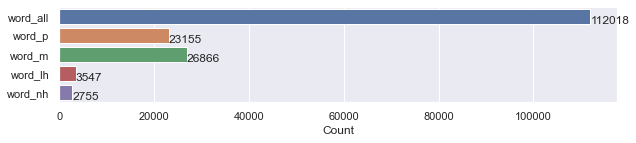

In [36]:
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=p_m_nh_lh_dipth_stats)
show_values_on_bars_h(ax)
fig.set_size_inches(10, 1.75)
ax.set(xlabel="Count", ylabel="")


In [37]:
writer = pd.ExcelWriter("word_dicio_aberto_lh_nh.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_lh.to_excel(writer, index=False, sheet_name='word_lh')
word_nh.to_excel(writer, index=False, sheet_name='word_nh')

writer.save()

# Free dipthong words

In [38]:
dipht_free_ai = word_df[word_df["word"].str.contains("ai")]
dipht_free_ei = word_df[word_df["word"].str.contains("ei|éi")]
dipht_free_oi = word_df[word_df["word"].str.contains("oi|ói")]
dipht_free_ui = word_df[word_df["word"].str.contains("ui")]
dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("gui|qui")]

In [39]:
writer = pd.ExcelWriter("word_dicio_aberto_dipht_free.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

dipht_free_ai.to_excel(writer, index=False, sheet_name='dipht_free_ai')
dipht_free_ei.to_excel(writer, index=False, sheet_name='dipht_free_ei')
dipht_free_oi.to_excel(writer, index=False, sheet_name='dipht_free_oi')
dipht_free_ui.to_excel(writer, index=False, sheet_name='dipht_free_ui')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_free.xlsx file copy sheets.

In [40]:
dipht_free_list = []
dipht_free_ai = pd.read_excel("word_dicio_aberto_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ai")
dipht_free_ai = dipht_free_ai[dipht_free_ai["Syllabifier"].str.contains("ai•|ai$")]
dipht_free_ai = len(dipht_free_ai)

dipht_free_ei = pd.read_excel("word_dicio_aberto_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ei")
dipht_free_ei = dipht_free_ei[dipht_free_ei["Syllabifier"].str.contains("ei•|ei$")]
dipht_free_ei = len(dipht_free_ei)

dipht_free_oi = pd.read_excel("word_dicio_aberto_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_oi")
dipht_free_oi = dipht_free_oi[dipht_free_oi["Syllabifier"].str.contains("oi•|oi$")]

dipht_free_ou_or_oi = dipht_free_oi.copy()
dipht_free_ou_or_oi["word"] = dipht_free_oi.replace(to_replace=r'oi', value='ou', regex=True)
dipht_free_ou = word_df[word_df["word"].str.contains("ou")]
dipht_free_ou_or_oi = dipht_free_ou[dipht_free_ou["word"].str.contains("ou")]
dipht_free_ou_or_oi = pd.merge(dipht_free_ou, dipht_free_ou_or_oi, how = "inner", indicator = False)
dipht_free_ou_or_oi = len(dipht_free_ou_or_oi)
dipht_free_oi = len(dipht_free_oi)

dipht_free_ui = pd.read_excel("word_dicio_aberto_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ui")
dipht_free_ui = dipht_free_ui[dipht_free_ui["Syllabifier"].str.contains("ui•|ui$")]
#dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("uim$|uir$")]
dipht_free_ui = len(dipht_free_ui)

dipht_free_list.append(["dipht_free_ai",dipht_free_ai])
dipht_free_list.append(["dipht_free_ei",dipht_free_ei])
dipht_free_list.append(["dipht_free_oi",dipht_free_oi])
dipht_free_list.append(["dipht_free_ou_or_oi",dipht_free_ou_or_oi])
dipht_free_list.append(["dipht_free_ui",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["item","length"])
dipht_free_df

,item,length
0,dipht_free_ai,1318
1,dipht_free_ei,6129
2,dipht_free_oi,1367
3,dipht_free_ou_or_oi,1114
4,dipht_free_ui,251


In [41]:
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.append(dipht_free_df)
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.reset_index(drop=True)
p_m_nh_lh_dipth_stats

,item,length
0,word_all,112018
1,word_p,23155
2,word_m,26866
3,word_lh,3547
4,word_nh,2755
5,dipht_free_ai,1318
6,dipht_free_ei,6129
7,dipht_free_oi,1367
8,dipht_free_ou_or_oi,1114
9,dipht_free_ui,251


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

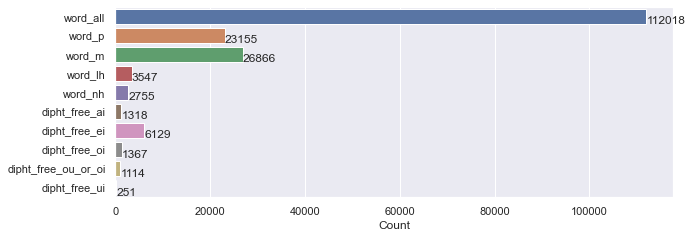

In [42]:
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=p_m_nh_lh_dipth_stats)
show_values_on_bars_h(ax)
fig.set_size_inches(10, 3.5)
ax.set(xlabel="Count", ylabel="")

# [lh] and [nh]

## vowels

In [43]:
dipht_free_list = []
dipht_free_list.append(["a","_i",dipht_free_ai])
dipht_free_list.append(["e","_i",dipht_free_ei])
dipht_free_list.append(["i","_i",0])
dipht_free_list.append(["o","_i",dipht_free_oi])
dipht_free_list.append(["u","_i",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["vowel","item","length"])
dipht_free_df

,vowel,item,length
0,a,_i,1318
1,e,_i,6129
2,i,_i,0
3,o,_i,1367
4,u,_i,251


In [44]:
palatal_vowel_list = []

left_a_lh = word_df[word_df["word"].str.contains("alh|álh|àlh|âlh")]
palatal_vowel_list.append(["a","_lh",len(left_a_lh)])
left_e_lh = word_df[word_df["word"].str.contains("elh|élh|èlh|êlh")]
palatal_vowel_list.append(["e","_lh",len(left_e_lh)])
left_i_lh = word_df[word_df["word"].str.contains("ilh|ílh|ìlh")]
palatal_vowel_list.append(["i","_lh",len(left_i_lh)])
left_o_lh = word_df[word_df["word"].str.contains("olh|ólh|òlh|ôlh")]
palatal_vowel_list.append(["o","_lh",len(left_o_lh)])
left_u_lh = word_df[word_df["word"].str.contains("ulh|úlh|ùlh")]
palatal_vowel_list.append(["u","_lh",len(left_u_lh)])

left_a_nh = word_df[word_df["word"].str.contains("anh|ánh|ành|ânh")]
palatal_vowel_list.append(["a","_nh",len(left_a_nh)])
left_e_nh = word_df[word_df["word"].str.contains("enh|énh|ènh|ênh")]
palatal_vowel_list.append(["e","_nh",len(left_e_nh)])
left_i_nh = word_df[word_df["word"].str.contains("inh|ính|ình")]
palatal_vowel_list.append(["i","_nh",len(left_i_nh)])
left_o_nh = word_df[word_df["word"].str.contains("onh|ónh|ònh|ônh")]
palatal_vowel_list.append(["o","_nh",len(left_o_nh)])
left_u_nh = word_df[word_df["word"].str.contains("unh|únh|ùnh")]
palatal_vowel_list.append(["u","_nh",len(left_u_nh)])

palatal_vowel_df = pd.DataFrame(palatal_vowel_list, columns=["vowel","item","length"])

palatal_vowel_df

,vowel,item,length
0,a,_lh,1091
1,e,_lh,560
2,i,_lh,1160
3,o,_lh,446
4,u,_lh,286
5,a,_nh,571
6,e,_nh,254
7,i,_nh,1552
8,o,_nh,165
9,u,_nh,204


In [45]:
vowel_combo_df = pd.concat([dipht_free_df, palatal_vowel_df], axis= 0)
vowel_combo_df

,vowel,item,length
0,a,_i,1318
1,e,_i,6129
2,i,_i,0
3,o,_i,1367
4,u,_i,251
0,a,_lh,1091
1,e,_lh,560
2,i,_lh,1160
3,o,_lh,446
4,u,_lh,286


In [46]:
df_count = vowel_combo_df.groupby(['vowel','item']).sum().unstack()
df_count

length            
item      _i   _lh   _nh
vowel                   
a       1318  1091   571
e       6129   560   254
i          0  1160  1552
o       1367   446   165
u        251   286   204

In [47]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df = norm_df
norm_df

length                      
item          _i        _lh        _nh
vowel                                 
a      14.539437  30.793113  20.793882
e      67.611693  15.805814   9.249818
i       0.000000  32.740615  56.518572
o      15.079978  12.588202   6.008740
u       2.768891   8.072255   7.428988

[Text(0, 0, '_i'), Text(1, 0, '_lh'), Text(2, 0, '_nh')]

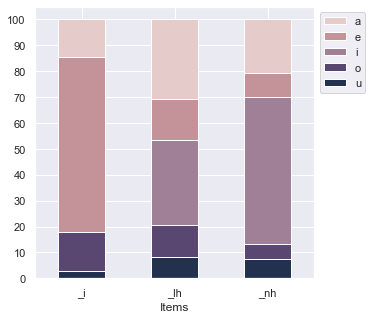

In [48]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(5,5), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['length']),rotation=0)



In [49]:
palatal_vowel_df

,vowel,item,length
0,a,_lh,1091
1,e,_lh,560
2,i,_lh,1160
3,o,_lh,446
4,u,_lh,286
5,a,_nh,571
6,e,_nh,254
7,i,_nh,1552
8,o,_nh,165
9,u,_nh,204


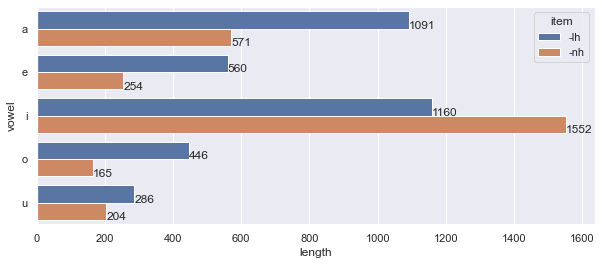

In [50]:
palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()

show_values_on_bars_h(ax)
fig.set_size_inches(10,4)

## contiguous left 

In [51]:
constiguous_left_list = []

dipht_lh = "ailh|iulh|uilh|eulh|éulh|eilh|éilh|oilh|óilh|aulh|oulh"
dipht_nh = "ainh|iunh|uinh|eunh|éunh|einh|éinh|oinh|óinh|aunh|ounh"
nasal_vowel_lh = "nlh|nnh|ãlh"
nasal_vowel_nh = "ãnh|õlh|õnh"

left_nasal_vowel_lh = word_df[word_df["word"].str.contains(nasal_vowel_lh)]
constiguous_left_list.append(["left_nasal_vowel_lh",len(left_nasal_vowel_lh)])
left_dipht_lh = word_df[word_df["word"].str.contains(dipht_lh)]
left_dipht_lh = left_dipht_lh[~left_dipht_lh["word"].str.contains("guilh|quilh|guelh|quelh")]
constiguous_left_list.append(["left_dipht_lh",len(left_dipht_lh)])
left_rot_lh = word_df[word_df["word"].str.contains("rlh")]
constiguous_left_list.append(["left_rot_lh",len(left_rot_lh)])
left_lat_lh = word_df[word_df["word"].str.contains("llh")]
constiguous_left_list.append(["left_lat_lh",len(left_lat_lh)])


left_nasal_vowel_nh = word_df[word_df["word"].str.contains(nasal_vowel_nh)]
constiguous_left_list.append(["left_nasal_vowel_nh",len(left_nasal_vowel_nh)])
left_dipht_nh = word_df[word_df["word"].str.contains(dipht_nh)]
left_dipht_nh = left_dipht_nh[~left_dipht_nh["word"].str.contains("guinh|quinh|guenh|quenh")]
constiguous_left_list.append(["left_dipht_nh",len(left_dipht_nh)])
left_rot_nh = word_df[word_df["word"].str.contains("rnh")]
constiguous_left_list.append(["left_rot_nh",len(left_rot_nh)])
left_lat_nh = word_df[word_df["word"].str.contains("lnh")]
constiguous_left_list.append(["left_lat_nh",len(left_lat_nh)])

constiguous_left_df = pd.DataFrame(constiguous_left_list, columns=["item","length"])
constiguous_left_df

,item,length
0,left_nasal_vowel_lh,1
1,left_dipht_lh,8
2,left_rot_lh,0
3,left_lat_lh,0
4,left_nasal_vowel_nh,0
5,left_dipht_nh,29
6,left_rot_nh,1
7,left_lat_nh,0


In [52]:
writer = pd.ExcelWriter("word_dicio_aberto_dipht_left_palatal.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

left_dipht_lh.to_excel(writer, index=False, sheet_name='left_dipht_lh')
left_dipht_nh.to_excel(writer, index=False, sheet_name='left_dipht_nh')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_left_palatal.xlsx file copy sheets. Phonological notes column is human corrected.

In [53]:
left_dipht_lh = pd.read_excel("word_dicio_aberto_dipht_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_lh")
left_dipht_lh = len(left_dipht_lh[left_dipht_lh["phonological_notes"]!="Hiatus"])
left_dipht_nh = pd.read_excel("word_dicio_aberto_dipht_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_nh")
left_dipht_nh = len(left_dipht_nh[left_dipht_nh["phonological_notes"]!="Hiatus"])
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_lh', 'length'] = left_dipht_lh
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_nh', 'length'] = left_dipht_nh
constiguous_left_df

,item,length
0,left_nasal_vowel_lh,1
1,left_dipht_lh,7
2,left_rot_lh,0
3,left_lat_lh,0
4,left_nasal_vowel_nh,0
5,left_dipht_nh,3
6,left_rot_nh,1
7,left_lat_nh,0


(0.0, 9.0)

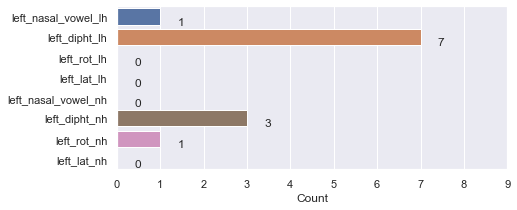

In [54]:
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=constiguous_left_df)
show_values_on_bars_h(ax)
fig.set_size_inches(7,3)
ax.set(xlabel="Count", ylabel="")
plt.xlim(0, 9)

## position

In [55]:
initial_lh = word_df[word_df["word"].str.contains("^lh")]
#initial_lh = len(initial_lh)
initial_nh = word_df[word_df["word"].str.contains("^nh")]
#initial_nh = len(initial_nh)

In [56]:
initial_lh

,word
74456,lhama
74458,lhanamente
74459,lhandras
74460,lhaneza
74461,lhano
74462,lhanura
74463,lhe
74464,lhiçada


In [57]:
initial_nh

,word
86189,nháfete
86190,nhambi
86191,nhambu
86192,nhandipapo
86193,nhandiroba
86194,nhandirova
86195,nhandu
86196,nhangue
86197,nhanhá
86198,nhanhã


In [58]:
initial_list = []

initial_lh = len(initial_lh)
initial_nh = len(initial_nh)

initial_list.append(["initial_lh",initial_lh])
initial_list.append(["initial_nh",initial_nh])


df_initial = pd.DataFrame(initial_list, columns=["item","length"])
df_initial

,item,length
0,initial_lh,8
1,initial_nh,28


### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_lh_nh.xlsx file copy sheets.

In [59]:
word_lh = pd.read_excel("word_dicio_aberto_lh_nh_with_syllabification.xlsx", sheet_name="word_lh")
word_nh = pd.read_excel("word_dicio_aberto_lh_nh_with_syllabification.xlsx", sheet_name="word_nh")

In [60]:
intermedial_list = []

intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh[^•]+•")]
not_intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+-•se$")]
intermedial_lh = len(intermedial_lh) - len(not_intermedial_lh)

intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh[^•]+•")]
not_intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+-•se$")]
intermedial_nh = len(intermedial_nh) - len(not_intermedial_nh)

intermedial_list.append(["intermedial_lh",intermedial_lh])
intermedial_list.append(["intermedial_nh",intermedial_nh])

df_intermedial = pd.DataFrame(intermedial_list, columns=["item","length"])
df_intermedial

C:\Users\el3gos\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,length
0,intermedial_lh,1480
1,intermedial_nh,1028


In [61]:
final_list = []

final_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+$|•lh([^•])+-•se$")]
final_lh = len(final_lh)

final_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+$|•nh([^•])+-•se$")]
final_nh = len(final_nh)

final_list.append(["final_lh",final_lh])
final_list.append(["final_nh",final_nh])

df_final = pd.DataFrame(final_list, columns=["item","length"])
df_final

C:\Users\el3gos\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,length
0,final_lh,2057
1,final_nh,1726


In [62]:
df = pd.concat([df_initial, df_intermedial, df_final], axis= 0)
df

,item,length
0,initial_lh,8
1,initial_nh,28
0,intermedial_lh,1480
1,intermedial_nh,1028
0,final_lh,2057
1,final_nh,1726


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

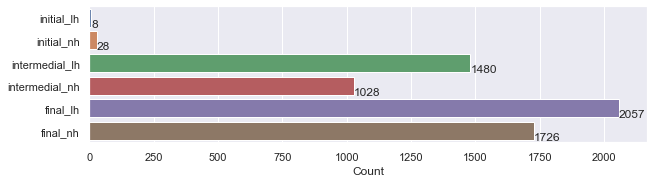

In [63]:
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df)
show_values_on_bars_h(ax)
fig.set_size_inches(10,2.5)
ax.set(xlabel="Count", ylabel="")

## double position

In [64]:
double_nh = word_df[word_df["word"].str.contains(".*nh.*nh.*")]
double_nh = double_nh[~double_nh["word"].str.contains("\-")]

double_nh_no_inho_a = double_nh[~double_nh["word"].str.contains("inho$|inha$")]

double_lh = word_df[word_df["word"].str.contains(".*lh.*lh.*")]
double_lh = double_lh[~double_lh["word"].str.contains("\-")]

double_list = []
double_nh = len(double_nh)
double_nh_no_inho_a = len(double_nh_no_inho_a)
double_lh = len(double_lh)

double_list.append(["double_nh",double_nh])
double_list.append(["double_nh_no_inho_a",double_nh_no_inho_a])
double_list.append(["double_lh",double_lh])

df_double = pd.DataFrame(double_list, columns=["item","length"])
df_double

,item,length
0,double_nh,24
1,double_nh_no_inho_a,15
2,double_lh,5


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

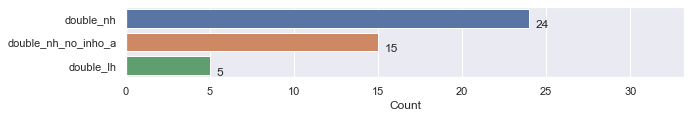

In [65]:
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df_double)
show_values_on_bars_h(ax)
fig.set_size_inches(10,1.3)
ax.set(xlabel="Count", ylabel="")